In [63]:
import os 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [64]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "House_data.csv")
filepath

'd:\\python_ml\\House\\House_data.csv'

In [65]:
house = pd.read_csv(filepath)
house

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
...               ...                   ...                  ...   
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  
0                  21250.213767  
1                  20880.600400  
2                  18811.487450  
3                  18031.047568  
4                  18031.047568  
...                         ...  
20635             222619.890417  
20636             218314.424634  
20637             212097.936232  
20638             207923.199166  
20639             205473.376575  

[20640 rows x 14 columns]

## EDA (Exploratory Data Analysis)

In [66]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [67]:
house.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20640.000000    2.064000e+04          2.064000e+04   
mean        40509.264883    2.694220e+05          3.981649e+05   
std         49140.039160    2.477324e+05          2.894006e+05   
min           120.676447    4.205891e+02          4.849180e+02   
25%          9079.756762    3.211125e+04          1.594264e+05   
50%         20522.019101    1.736675e+05          2.147398e+05   
75%         49830.414479    5.271562e+05          7.057954e+05   
max        333804.686371    1.018260e+06          1.196919e+06   

       Distance_to_SanJose  Distance_to_SanFrancisco  
count         20640.000000              20640.000000  
mean         349187.551219             386688.422291  
std          217149.875026             250122.192316  
min             569.448118                456.141313  
25%          113119.928682             117395.477505  
50%          459758.877000             526546.661701  
75%          516946.490963             584552.007907  
max          836762.678210             903627.663298

In [68]:
dict = {}
for col in list(house.columns):
    dict[col] = house[col].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

unique count
Median_House_Value                3842
Median_Income                    12928
Median_Age                          52
Tot_Rooms                         5926
Tot_Bedrooms                      1928
Population                        3888
Households                        1815
Latitude                           862
Longitude                          844
Distance_to_coast                12590
Distance_to_LA                   12590
Distance_to_SanDiego             12590
Distance_to_SanJose              12590
Distance_to_SanFrancisco         12590

In [69]:
cont_col = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Distance_to_coast', 
            'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
loc_col = ['Latitude', 'Longitude']
dist_col = ['Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
target = 'Median_House_Value'

In [70]:
import matplotlib.gridspec as gridspec
from scipy import stats
from scipy.stats import norm

In [71]:
def remove_outlier(house, col_name):
    q1 = house[col_name].quantile(0.25)
    q3 = house[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    outlier = []
    for i in house[col_name]:
        if i<(q1 - 1.5 * iqr) or i>(q3 + 1.5 * iqr):
            outlier.append(i)
    outlier = pd.DataFrame(outlier,columns=['outlier'])
    print('There is {}% Outlier removed in {} according to IQR rule'.format(round((outlier.shape[0]/house.shape[0])*100,2),col_name))
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    house = house[(house[col_name] > fence_low) & (house[col_name] < fence_high)]
    return house

def corrmatrix(house,target_col,num=len(house)):
    corrmatrix = house.corr()
    plt.figure(figsize = (20,10))
    columnss = corrmatrix.nlargest(num, target_col)[target_col].index
    cm = np.corrcoef(house[columnss].values.T)
    sns.set(font_scale = 1)
    mask = np.triu(np.ones_like(house.corr(), dtype=np.bool))
    hm = sns.heatmap(cm, cbar = True, annot = True, square = True,mask = mask, cmap = "RdPu" ,  fmt = ".2f", annot_kws = {"size": 10},
                     yticklabels = columnss.values, xticklabels = columnss.values)
    plt.show()
    
def visualize_target(house, feature):
    print('Feature: {}, Skewness: {}, Kurtosis: {}'.format(feature,round(house[feature].skew(),5),round(house[feature].kurt(),5)))
    
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    grid = gridspec.GridSpec(ncols=5, nrows=5, figure=fig)

    ax1 = fig.add_subplot(grid[0:2, :4])
    ax1.set_title('Histogram')
    sns.distplot(house.loc[:,feature], norm_hist=True,fit=norm, ax = ax1,color='indianred')

    ax2 = fig.add_subplot(grid[2:, :4])
    ax2.set_title('QQ_plot')
    stats.probplot(house.loc[:,feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 4])
    ax3.set_title('Box Plot')
    sns.boxplot(y=house.loc[:,feature], orient='v', ax = ax3,color='indianred')

Feature: Median_House_Value, Skewness: 0.97776, Kurtosis: 0.32787


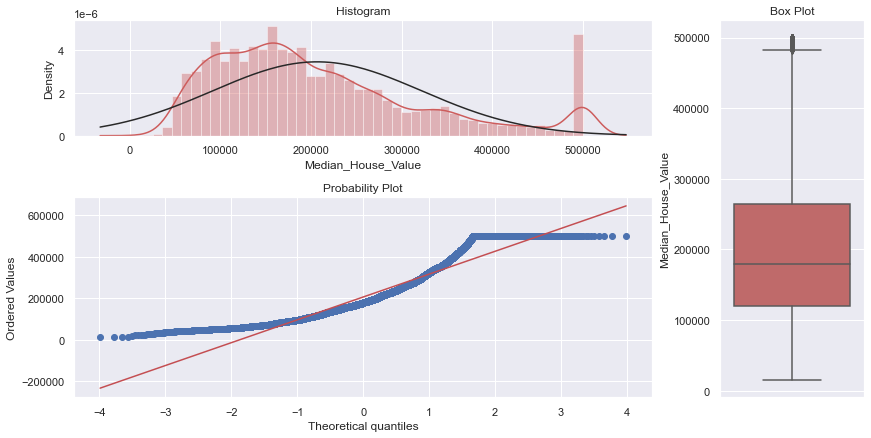

In [72]:
visualize_target(house,target)

In [73]:
house = remove_outlier(house,target)

There is 5.19% Outlier removed in Median_House_Value according to IQR rule


Feature: Median_House_Value, Skewness: 0.75595, Kurtosis: 0.0127


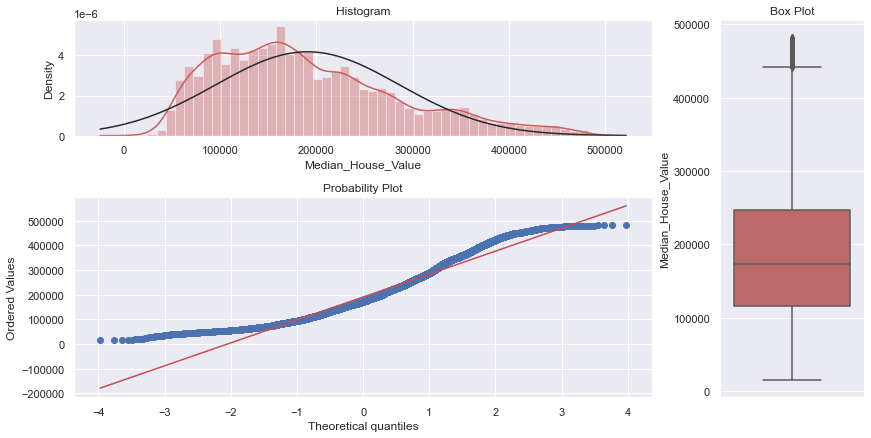

In [74]:
visualize_target(house,target)

In [75]:
house["Median_House_Value"] = np.log(house["Median_House_Value"])

Feature: Median_House_Value, Skewness: -0.31629, Kurtosis: -0.36984


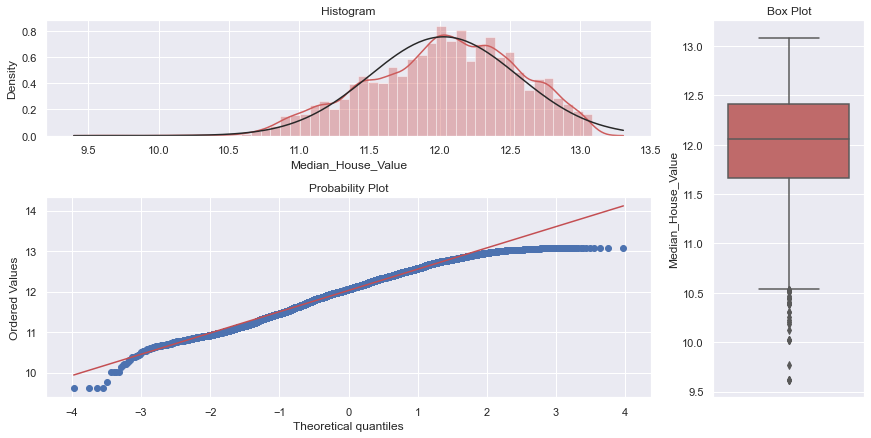

In [76]:
visualize_target(house,target)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


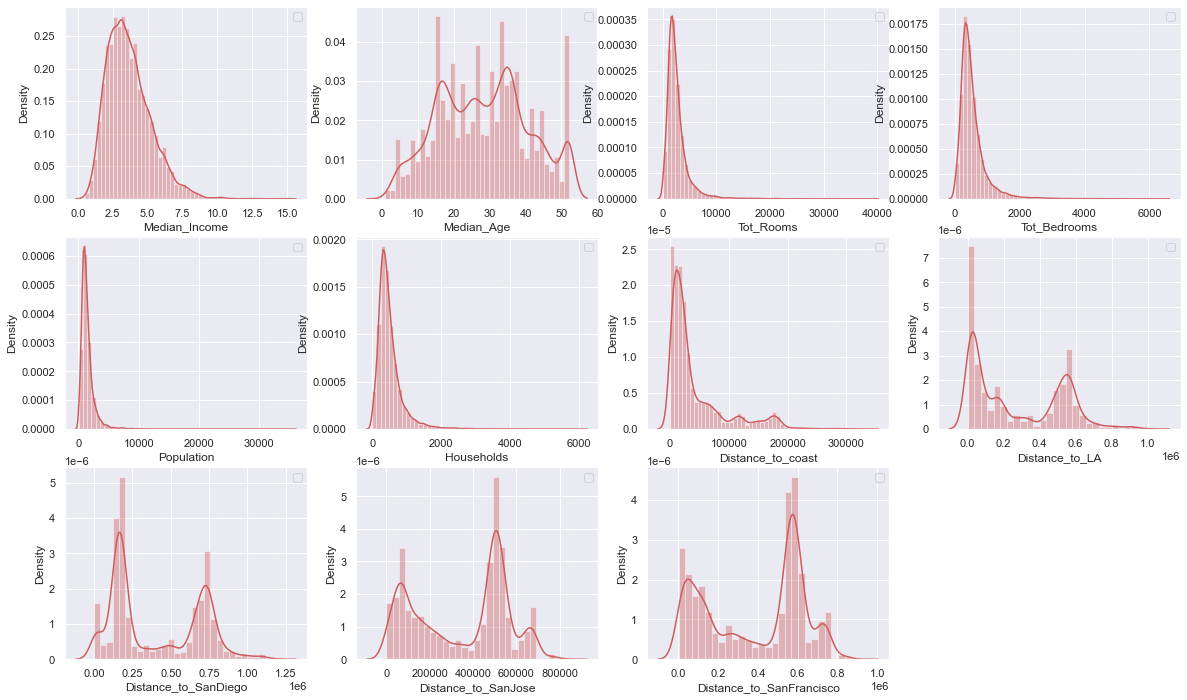

In [77]:
plt.figure(figsize=(20, 12))
for i, column in enumerate(cont_col, 1):
    plt.subplot(3, 4, i)
    sns.distplot(x=house[column],color='indianred')
    plt.legend()
    plt.xlabel(column)

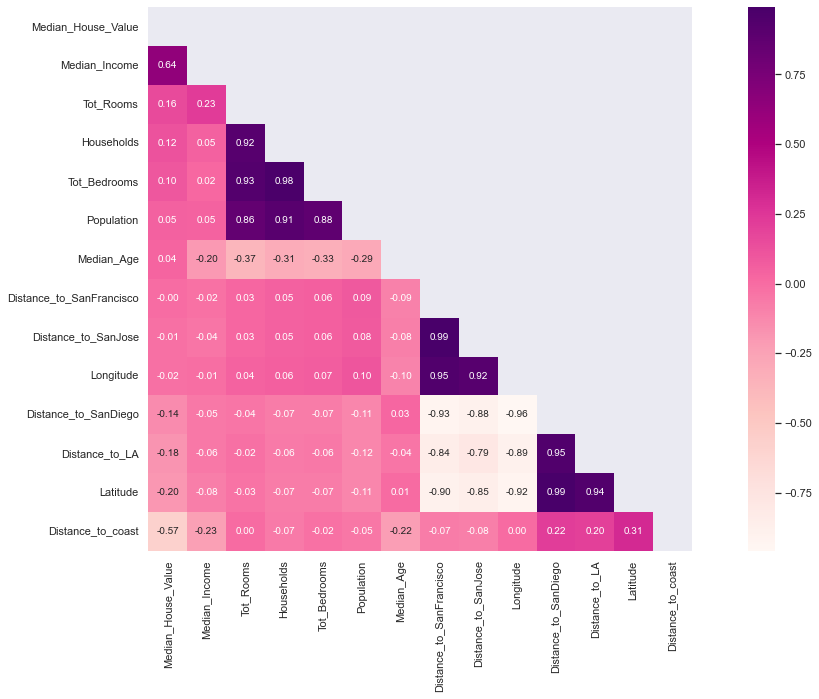

In [78]:
 corrmatrix(house,target)

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn import ensemble
from xgboost.sklearn import XGBRegressor

In [80]:
x = house.drop(['Median_House_Value','Longitude','Latitude'],axis=1)
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
y = house['Median_House_Value']

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)
print(f'Train input: {x_train.shape}')
print(f'Train target: {y_train.shape}')
print(f'Test input: {x_test.shape}')
print(f'Test target: {y_test.shape}')

Train input: (15655, 11)
Train target: (15655,)
Test input: (3914, 11)
Test target: (3914,)


In [81]:
r2 = []
model = []
RMSE = []
regressor = [LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),ensemble.GradientBoostingRegressor(),XGBRegressor()]
for obj in regressor:
    model_name = type(obj).__name__
    obj.fit(x_train,y_train)
    predict=obj.predict(x_test)
    r2.append(r2_score(y_test,predict))
    model.append(model_name)
    RMSE.append(mean_squared_error(y_test, predict, squared=False))
models = pd.DataFrame({'Model':model, 'r2':r2, 'RMSE':RMSE})
print(models)

                       Model        r2      RMSE
0           LinearRegression  0.666285  0.308908
1      RandomForestRegressor  0.817805  0.228249
2        KNeighborsRegressor  0.728809  0.278470
3  GradientBoostingRegressor  0.775530  0.253350
4               XGBRegressor  0.823226  0.224828


Text(0.5, 1.0, 'RMSE for models')

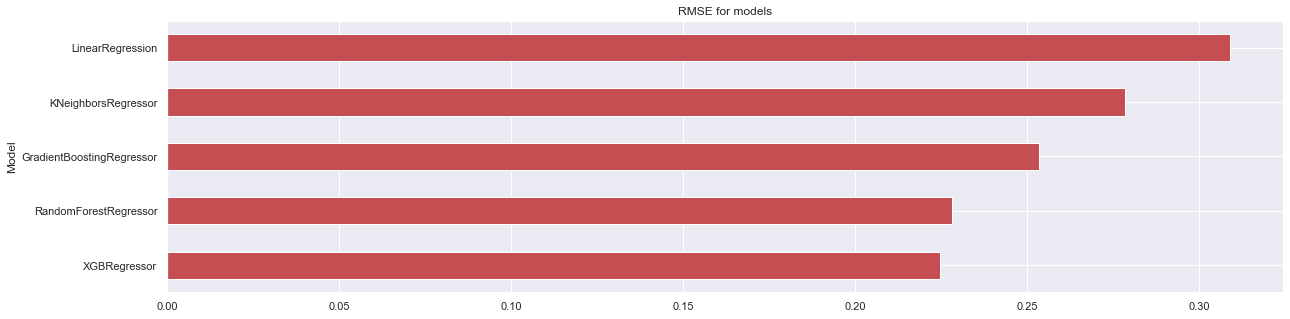

In [82]:
models = models.set_index('Model')
plt.figure(figsize=(20,5))
models['RMSE'].sort_values().plot(kind='barh', color='r', align='center')
plt.title('RMSE for models')

In [83]:
reg = XGBRegressor()
reg.fit(x_train,y_train)
model_name = type(reg).__name__

for name, importance in zip(x, reg.feature_importances_):
    print(name, "=", round(importance,3))

Median_Income = 0.172
Median_Age = 0.022
Tot_Rooms = 0.028
Tot_Bedrooms = 0.038
Population = 0.04
Households = 0.031
Distance_to_coast = 0.404
Distance_to_LA = 0.064
Distance_to_SanDiego = 0.06
Distance_to_SanJose = 0.072
Distance_to_SanFrancisco = 0.07


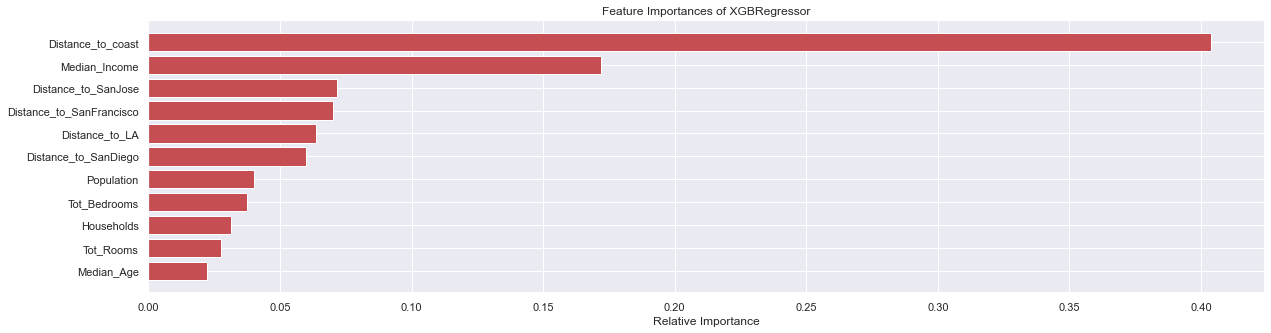

In [84]:
features = x
importances = reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,5))
plt.title('Feature Importances of {}'.format(model_name))
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)),features.columns[indices])
plt.xlabel('Relative Importance')
plt.show()


Accuracy score for XGBRegressor is 0.80, RMSE is 43202.41


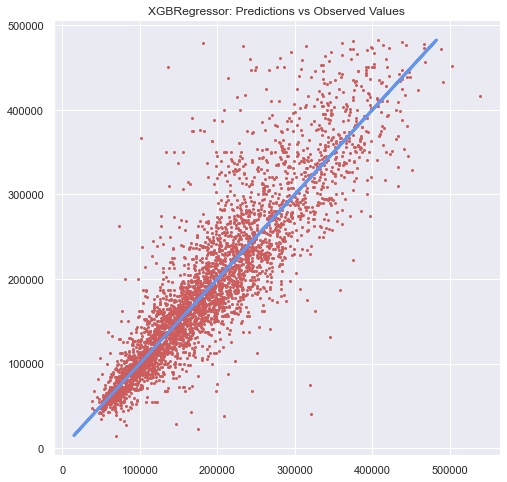

In [85]:
y_test = np.exp(y_test)
y_pred = np.exp(reg.predict(x_test))

model_name = type(reg).__name__
plt.subplots(figsize=(8,8))
plt.scatter(y_pred,y_test,s=4, color='indianred')
plt.plot(y_test, y_test,color='cornflowerblue', linewidth=3)
plt.title('{}: Predictions vs Observed Values'.format(model_name))
print("Accuracy score for {} is {:.2f}, RMSE is {:.2f}".format(model_name,r2_score(y_test, y_pred),mean_squared_error(y_test, y_pred, squared=False)))
